## Dataset TSE

In [1]:
descricao_eleicao = 'ELEIÇÕES GERAIS ESTADUAIS 2022'
data = 'DT_ELEICAO'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('votacao_secao_2022_PA.csv', encoding='ISO-8859-1', sep=";")

In [4]:
df['DS_CARGO'].unique()

array(['DEPUTADO ESTADUAL', 'DEPUTADO FEDERAL', 'SENADOR', 'GOVERNADOR'],
      dtype=object)

Selecionando somente registros de Deputado Federal

In [6]:
dep_federal = df[df['DS_CARGO'] == 'DEPUTADO FEDERAL']

Removendo colunas que não agregam informação, ou pois contém metadados, ou um valor constante.

In [7]:
data_tse = dep_federal.drop([
    'DT_GERACAO', 'HH_GERACAO', 'NM_TIPO_ELEICAO', 'CD_TIPO_ELEICAO',
    'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'TP_ABRANGENCIA',
    'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'DT_ELEICAO', 'ANO_ELEICAO',
    'NR_LOCAL_VOTACAO',	'SQ_CANDIDATO',	'NM_LOCAL_VOTACAO',	'DS_LOCAL_VOTACAO_ENDERECO',
    'NR_ZONA', 'NR_SECAO'
], axis=1)

In [10]:
data_tse.sample(frac=1)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
1166608,4154,ANANINDEUA,1577,RENILCE CONCEIÇÃO NICODEMOS DE ALBUQUERQUE,1
1609713,5975,DOM ELISEU,2222,EDER MAURO CARDOSO BARRA,16
373017,5053,ORIXIMINÁ,1212,GIOVANNI CORRÊA QUEIROZ,15
2060561,5835,PARAUAPEBAS,5510,AURELIO RAMOS DE OLIVEIRA NETO,61
1459042,5177,PORTO DE MOZ,1577,RENILCE CONCEIÇÃO NICODEMOS DE ALBUQUERQUE,75
...,...,...,...,...,...
2018293,4014,ABAETETUBA,1456,PAULO EDUARDO MAESTRI BENGTSON,1
605288,4774,JURUTI,4400,HÉLIO LEITE DA SILVA,44
592509,4057,AFUÁ,1555,JOSE BENITO PRIANTE JUNIOR,38
375359,4472,CASTANHAL,1212,GIOVANNI CORRÊA QUEIROZ,1


In [11]:
tse_ibge = pd.read_json('./datasets/municipios_brasileiros_tse.json')
tse_ibge_pa = tse_ibge[tse_ibge['uf'] == 'PA'][['codigo_tse', 'codigo_ibge']]
tse_ibge_pa = tse_ibge_pa.to_dict(orient='records')

In [12]:
tse_ibge[tse_ibge['uf'] == 'PA']

,codigo_tse,uf,nome_municipio,capital,codigo_ibge
2418,4014,PA,ABAETETUBA,0,1500107
2419,4502,PA,ABEL FIGUEIREDO,0,1500131
2420,4030,PA,ACARÁ,0,1500206
2421,4057,PA,AFUÁ,0,1500305
2422,4073,PA,ALENQUER,0,1500404
...,...,...,...,...,...
2557,5657,PA,VISEU,0,1508308
2558,4405,PA,VITÓRIA DO XINGU,0,1508357
2559,5711,PA,XINGUARA,0,1508407
2560,4260,PA,ÁGUA AZUL DO NORTE,0,1500347


In [13]:
from functools import reduce
dict_tse_ibge = reduce(lambda agg, cur: { cur['codigo_tse'] : cur['codigo_ibge'], **agg }, tse_ibge_pa, {})

In [14]:
cod_ibge = list(map(lambda cod: dict_tse_ibge[cod],  list(data_tse['CD_MUNICIPIO'])))

In [15]:
data_tse['CD_IBGE'] = cod_ibge
data_tse = data_tse.drop(['CD_MUNICIPIO'], axis=1)

In [20]:
print(data_tse.sample(frac=1).head(5).to_latex())

\begin{tabular}{llrlrr}
\toprule
 & NM_MUNICIPIO & NR_VOTAVEL & NM_VOTAVEL & QT_VOTOS & CD_IBGE \\
\midrule
1765601 & BELÉM & 13 & Partido dos Trabalhadores & 3 & 1501402 \\
564085 & SANTARÉM & 2022 & WELLINGTON DE SOUZA GALDINO & 3 & 1506807 \\
488712 & BRAGANÇA & 4050 & LILIANA MARIA TORRES CALDAS & 1 & 1501709 \\
1999489 & LIMOEIRO DO AJURU & 1555 & JOSE BENITO PRIANTE JUNIOR & 1 & 1504000 \\
2108856 & ALTAMIRA & 1501 & WAGNE COSTA MACHADO & 3 & 1500602 \\
\bottomrule
\end{tabular}



In [79]:
groups = data_tse.groupby(['NM_MUNICIPIO', 'CD_IBGE', 'NR_VOTAVEL', 'NM_VOTAVEL'])

In [80]:
df_by_municipios = groups['QT_VOTOS'].sum().reset_index().sort_values('QT_VOTOS', ascending=False)

In [81]:
dict_voto_mun = df_by_municipios.to_dict(orient="records")

## Dataset IBGE - Polígonos dos municípios de PA

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
myshpfile = gpd.read_file('./poligonos/PA_Municipios_2023.shp')
myshpfile.to_file('./datasets/pa.geojson', driver='GeoJSON')

In [53]:
df_places = gpd.read_file('./datasets/pa.geojson')

In [24]:
geografia = df_places[['CD_MUN', 'NM_MUN', 'geometry']]

In [31]:
print(geografia['geometry'])

0      POLYGON ((-48.91969 -1.94722, -48.91996 -1.946...
1      POLYGON ((-48.39828 -4.86941, -48.39526 -4.870...
2      POLYGON ((-48.14599 -1.77280, -48.14065 -1.772...
3      MULTIPOLYGON (((-50.28965 -0.11142, -50.19598 ...
4      POLYGON ((-50.52886 -7.12397, -50.53353 -7.119...
                             ...                        
139    POLYGON ((-53.50069 -3.29349, -53.49927 -3.296...
140    POLYGON ((-48.11045 -1.01689, -48.11081 -1.016...
141    MULTIPOLYGON (((-46.14019 -1.21588, -46.14242 ...
142    POLYGON ((-51.94538 -3.47747, -51.94801 -3.475...
143    POLYGON ((-49.33920 -6.77804, -49.33773 -6.729...
Name: geometry, Length: 144, dtype: geometry


## Dados relativos à taxa de natalidade e distribuição de idade por municipio

Foram utilizados dados do https://www.fapespa.pa.gov.br/ referentes ao ano 2022.

- Taxa de natalidade: https://fapespa.pa.gov.br/sistemas/anuario2023/tabelas/social/5.5-saude/tab-5.5.4-taxa-de-natalidade-2018-a-2022.htm
- Distribuição de idade: https://fapespa.pa.gov.br/sistemas/anuario2023/tabelas/demografia/tab-1.2-populacao-por-faixa-etaria-2018-a-2022.htm

## Dados relativos a vac

In [44]:
import xlrd

In [ ]:
demographic_data = []

workbook = xlrd.open_workbook(f"./datasets/natalidade.xls")
birth = workbook.sheet_by_name('sau4')
workbook = xlrd.open_workbook(f"./datasets/taxa-populacao.xls")
taxa = workbook.sheet_by_name('dem2')

for i in range(0, 144):
    city = birth.cell(i, 0).value
    rate = birth.cell(i, 1).value

    ages = {}
    for j in range(1, 12):
        title = taxa.cell(0, j).value
        value = int(taxa.cell(i+1, j).value)
        ages[title] = value

    demographic_data.append({ "city": city, "taxa_nascimento": rate, **ages })

city_name_ibge = {}
for record in demographic_data:
    code = tse_ibge[tse_ibge['uf'] == 'PA'][tse_ibge['nome_municipio'] == record['city'].upper()]['codigo_ibge'].values

    if code:
        city_name_ibge[record['city']] = code[0]

city_name_ibge['Eldorado do Carajás'] = 1502954
city_name_ibge['Santa Izabel do Pará'] = 1506500
city_name_ibge['Mojuí dos Campos'] = 1504752

In [50]:
dados_demograficos = pd.DataFrame(demographic_data)
print(dados_demograficos.sample(frac=1).head(3).to_latex())

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
 & city & taxa_nascimento & 0 a 4 anos & 5 a 9 anos & 10 a 14 anos & 15 a 19 anos & 20 a 29 anos & 30 a 39 anos & 40 a 49 anos & 50 a 59 anos & 60 a 69 anos & 70 a 79 anos & 80 anos e mais \\
\midrule
27 & Breves & 24.624187 & 12219 & 11581 & 11512 & 11594 & 19842 & 14406 & 10835 & 6763 & 4577 & 2440 & 1199 \\
105 & Salvaterra & 13.510713 & 1889 & 1958 & 2081 & 2107 & 4059 & 3833 & 3143 & 2325 & 1535 & 830 & 369 \\
4 & Água Azul do Norte & 12.112832 & 1624 & 1687 & 1572 & 1471 & 2988 & 3120 & 2539 & 1435 & 1009 & 459 & 176 \\
\bottomrule
\end{tabular}



## Dados Vacinais

In [55]:
vacinas = []
import xlrd

workbook = xlrd.open_workbook(f"./datasets/cobertura-vacinal.xls")
cobertura = workbook.sheet_by_name('Sheet1')

In [56]:
dados = []
for i in range(0, 144):
    city = cobertura.cell(i+1, 0).value
    code_ibge, city_name = [c.strip() for c in city.split(" - ")]
    new_code_ibge = city_name_ibge[city_name]

    for j in range(2, 21):
        tipo = cobertura.cell(0, j).value
        valor = cobertura.cell(i+1, j).value
        dados.append({ "city": new_code_ibge, "tipo": tipo, "cobertura": valor })

In [108]:
pd.DataFrame(dados).sort_values('cobertura', ascending=False)

,city,tipo,cobertura
337,1501758,Polio Oral Bivalente,1.636364
339,1501758,Tríplice Viral - 1° Dose,1.581818
812,1503002,Polio Oral Bivalente,1.530303
335,1501758,Pneumo 10 (1° Reforço),1.527273
1002,1501006,Polio Oral Bivalente,1.526718
...,...,...,...
2716,1504505,Varicela,0.184438
995,1501006,Hepatite B (< 30 dias),0.160305
2431,1505205,Varicela,0.154348
589,1507508,BCG,0.127119


# Importar dados - SQL

![title](images/bd.drawio.png)

In [47]:
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *

db_url = 'postgresql://postgres:@localhost:5432/geodb'
engine = create_engine(db_url, echo=False)
#engine.execute("CREATE EXTENSION POSTGIS;")

In [117]:
engine.execute("""
CREATE TABLE candidato (
  id SERIAL PRIMARY KEY NOT NULL,
  nome VARCHAR(255),
  numero INTEGER
);
""")

engine.execute("""
CREATE TABLE municipio (
  id SERIAL PRIMARY KEY NOT NULL,
  cod_ibge INTEGER,
  nome VARCHAR(30),
  uf VARCHAR(2),
  geom GEOMETRY
);
""")

engine.execute("""
CREATE TABLE voto_candidato (
  id SERIAL PRIMARY KEY NOT NULL,
  num_votos INTEGER,
  id_candidato INTEGER REFERENCES voto_candidato (id),
  id_municipio INTEGER REFERENCES municipio (id)
);
""")

engine.execute("""
CREATE TABLE vacinacao_municipio (
  id SERIAL PRIMARY KEY NOT NULL,
  id_municipio INTEGER REFERENCES municipio (id),
  tipo VARCHAR(100),
  cobertura DECIMAL
);
""")

engine.execute("""
CREATE TABLE demografia_municipio (
  id SERIAL PRIMARY KEY NOT NULL,
  id_municipio INTEGER REFERENCES municipio (id),
  taxa_natalidade INTEGER,
  idade_0_a_4 INTEGER,
  idade_5_a_9 INTEGER,
  idade_10_a_14 INTEGER,
  idade_15_a_19 INTEGER,
  idade_20_a_29 INTEGER,
  idade_30_a_39 INTEGER,
  idade_40_a_49 INTEGER,
  idade_50_a_59 INTEGER,
  idade_60_a_69 INTEGER,
  idade_70_a_79 INTEGER,
  idade_acima_80 INTEGER
);
""")

### Criando municipios

In [407]:
geografia = geografia.rename(columns={"CD_MUN": "cod_ibge", "NM_MUN": "nome", "geometry": "geom"})

In [408]:
geografia['uf'] = 'PA'

In [409]:
geografia

,cod_ibge,nome,geom,uf
0,1500107,Abaetetuba,"POLYGON ((-48.91968659999998 -1.947218, -48.91...",PA
1,1500131,Abel Figueiredo,POLYGON ((-48.398278199999936 -4.8694072999999...,PA
2,1500206,Acará,POLYGON ((-48.14598689999997 -1.77279829999997...,PA
3,1500305,Afuá,"MULTIPOLYGON (((-50.289652 -0.11141589999994, ...",PA
4,1500347,Água Azul do Norte,POLYGON ((-50.528858199999945 -7.1239720999999...,PA
...,...,...,...,...
139,1508159,Uruará,POLYGON ((-53.50069359999998 -3.29348639999994...,PA
140,1508209,Vigia,POLYGON ((-48.11044609999993 -1.01688779999994...,PA
141,1508308,Viseu,MULTIPOLYGON (((-46.14019119999995 -1.21587969...,PA
142,1508357,Vitória do Xingu,POLYGON ((-51.94537969999993 -3.47746839999996...,PA


In [410]:
sql = """INSERT INTO municipio (cod_ibge, nome, uf, geom) VALUES """
for record in geografia.to_dict(orient="records"):
    if "'" in record['nome']:
        record['nome'] = record['nome'].replace("'", " ")
    sql += f"('{record['cod_ibge']}', '{record['nome']}', '{record['uf']}', ST_GeomFromText('{record['geom']}', 4674)), "
sql = sql[:-2]

In [411]:
engine.execute(sql)

### Criando candidato

In [412]:
num_candidatos = df_by_municipios[['NR_VOTAVEL', 'NM_VOTAVEL']].groupby(['NR_VOTAVEL', 'NM_VOTAVEL']).groups.keys()

In [413]:
sql = "INSERT INTO candidato (nome, numero) VALUES "
for num, candidato in num_candidatos:
    sql += f"('{candidato}', {num}), "
sql = sql[:-2]

In [414]:
engine.execute(sql)

### Criando voto_candidato

In [415]:
id_candidato = dict(engine.execute("SELECT numero, id FROM candidato").fetchall())

In [111]:
id_municipio = dict(engine.execute("SELECT cod_ibge, id FROM municipio").fetchall())

In [417]:
sql = "INSERT INTO voto_candidato (num_votos, id_candidato, id_municipio) VALUES "
for voto in dict_voto_mun:
    num_can = voto['NR_VOTAVEL']
    qtd = voto['QT_VOTOS']
    ibge = voto['CD_IBGE']

    sql += f"({qtd}, {id_candidato[num_can]}, {id_municipio[ibge]}), "

sql = sql[:-2]

In [418]:
engine.execute(sql)

### Criando demografia

In [419]:
sql = "INSERT INTO demografia_municipio (id_municipio, taxa_natalidade, idade_0_a_4, idade_5_a_9, idade_10_a_14, idade_15_a_19, idade_20_a_29, idade_30_a_39, idade_40_a_49, idade_50_a_59, idade_60_a_69, idade_70_a_79, idade_acima_80) VALUES "
for record in dados_demograficos.to_dict(orient="records"):
    values = ", ".join(map(str, list(record.values())[1:]))
    ibge = city_name_ibge[record['city']]
    sql += f"({id_municipio[ibge]}, {values}), "
sql = sql[:-2]

In [56]:
engine.execute(sql)

### Criando Vacinas

In [118]:
sql = "INSERT INTO vacinacao_municipio (id_municipio, cobertura, tipo) VALUES "
for record in dados:
    ibge =  id_municipio[record['city']]
    cobertura = record['cobertura']
    tipo = record['tipo']
    sql += f"({ibge}, {cobertura}, '{tipo}'), "
sql = sql[:-2]

In [119]:
engine.execute(sql)

# Análise

![title](images/pa.png)

## Total de votos

### Votos em Legenda (somente Partido)

```sql
select sum(num_votos)
from voto_candidato vc 
inner join candidato c on c.id = vc.id_candidato
where c.numero <= 90
```
Total: 137,975

### Votos em Branco

```sql
select sum(num_votos)
from voto_candidato vc 
inner join candidato c on c.id = vc.id_candidato
where c.numero = 95
```

Total: 152,467


### Votos Nulos

```sql
select sum(num_votos)
from voto_candidato vc 
inner join candidato c on c.id = vc.id_candidato
where c.numero = 96
```

Total: 95,893


### Votos em Candidatos

```sql
select sum(num_votos)
from voto_candidato vc 
inner join candidato c on c.id = vc.id_candidato
where c.numero >= 1000
```

Total: 4,398,937

### Top 20 candidatos mais votados

```sql
select *
from (
	select c.nome, c.numero, sum(num_votos)
	from voto_candidato vc 
	inner join candidato c on c.id = vc.id_candidato
	where c.numero >= 1000
	group by c.nome, c.numero
) as can
order by can.sum desc
limit 25
```

![title](images/top-25.png)

O estado do Pará tem 17 vagas disponíveis para Deputado Federal. E com base nos votos válidos de 2022, cada vaga custa 266,877 votos.

```sql
with total_votos as (
	select sum(num_votos)
	from voto_candidato vc 
	inner join candidato c on c.id = vc.id_candidato
	where c.numero >= 1000 or c.numero <= 90 -- votos válidos
)

select (select cast(sum as float) from total_votos)/17 -- 266877.1768
```

### Proporção de votos por partido

```sql
select can.partido, can.sum as votos_partido, can.sum/(select cast(sum as float) from total_votos)*100 as proporcao_partido
from (
	select substr(cast(c.numero as varchar), 1,2) as partido, sum(num_votos)
	from voto_candidato vc 
	inner join candidato c on c.id = vc.id_candidato
	where c.numero >= 1000 or c.numero <= 90
	group by substr(cast(c.numero as varchar), 1,2)
) can
order by can.sum desc
```
    
![title](images/proporcao-partidos.png)

Analisar:

1) Dados estatísticos sobre numero medio de idade de cada municipio
2) Media, std de cada candidato por voto em cada cidade

## Boxplot distribuição de idade

In [124]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
demografia_municipios = engine.execute("SELECT * FROM demografia_municipio").fetchall()

In [19]:
idades = {
  "idade_0_a_4": [],
  "idade_5_a_9": [],
  "idade_10_a_14": [],
  "idade_15_a_19": [],
  "idade_20_a_29": [],
  "idade_30_a_39": [],
  "idade_40_a_49": [],
  "idade_50_a_59": [],
  "idade_60_a_69": [],
  "idade_70_a_79": [],
  "idade_acima_80": []
}

for demografia in demografia_municipios:
    idades["idade_0_a_4"].append(demografia[3])
    idades["idade_5_a_9"].append(demografia[4])
    idades["idade_10_a_14"].append(demografia[5])
    idades["idade_15_a_19"].append(demografia[6])
    idades["idade_20_a_29"].append(demografia[7])
    idades["idade_30_a_39"].append(demografia[8])
    idades["idade_40_a_49"].append(demografia[9])
    idades["idade_50_a_59"].append(demografia[10])
    idades["idade_60_a_69"].append(demografia[11])
    idades["idade_70_a_79"].append(demografia[12])
    idades["idade_acima_80"].append(demografia[13])

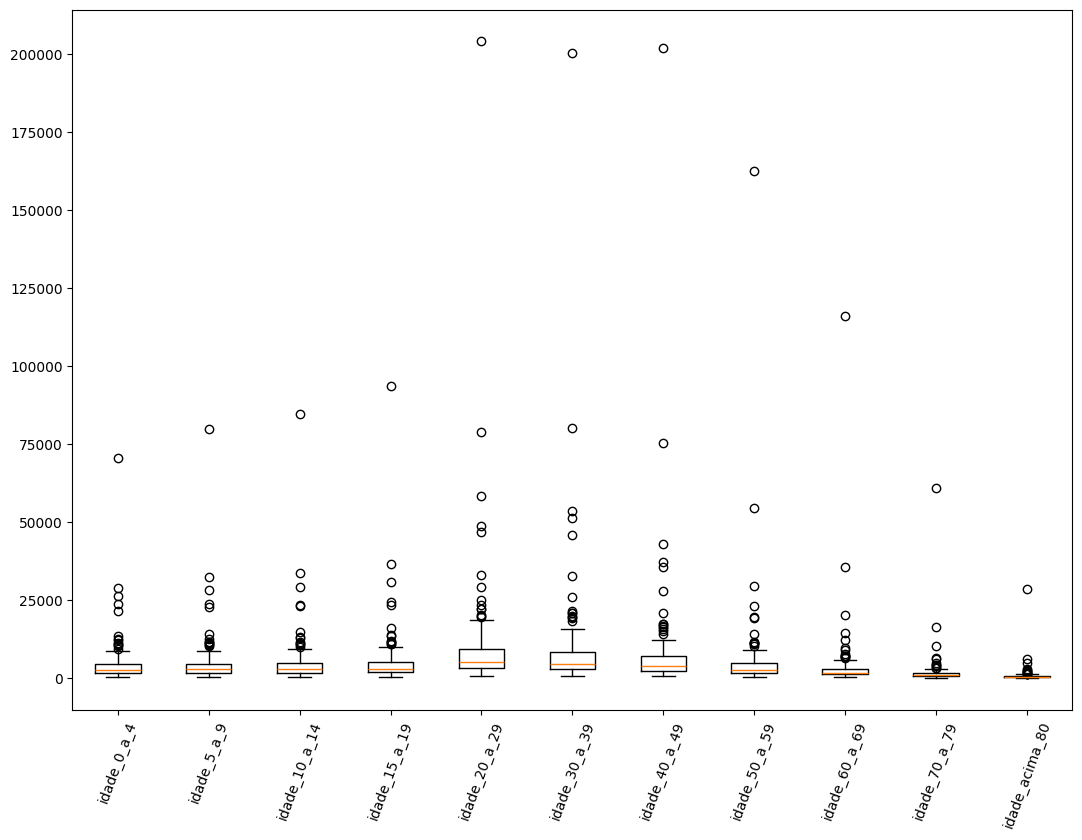

In [29]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(idades.values())
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], idades.keys())
plt.xticks(rotation=70)

# show plot
plt.show()

In [43]:
engine.execute("""
    SELECT m.nome 
    FROM demografia_municipio AS dm
    INNER JOIN municipio AS m ON m.id = dm.id_municipio
    WHERE dm.idade_acima_80 = (SELECT max(idade_acima_80) FROM demografia_municipio)
""").fetchall()

[('Belém',)]

In [42]:
engine.execute("""
    SELECT m.nome 
    FROM demografia_municipio AS dm
    INNER JOIN municipio AS m ON m.id = dm.id_municipio
    WHERE dm.idade_0_a_4 = (SELECT max(idade_0_a_4) FROM demografia_municipio)
""").fetchall()

[('Belém',)]

## Boxplot taxa de natalidade

In [59]:
demografia_municipios = engine.execute("SELECT taxa_natalidade FROM demografia_municipio").fetchall()
taxas = [d[0] for d in demografia_municipios]

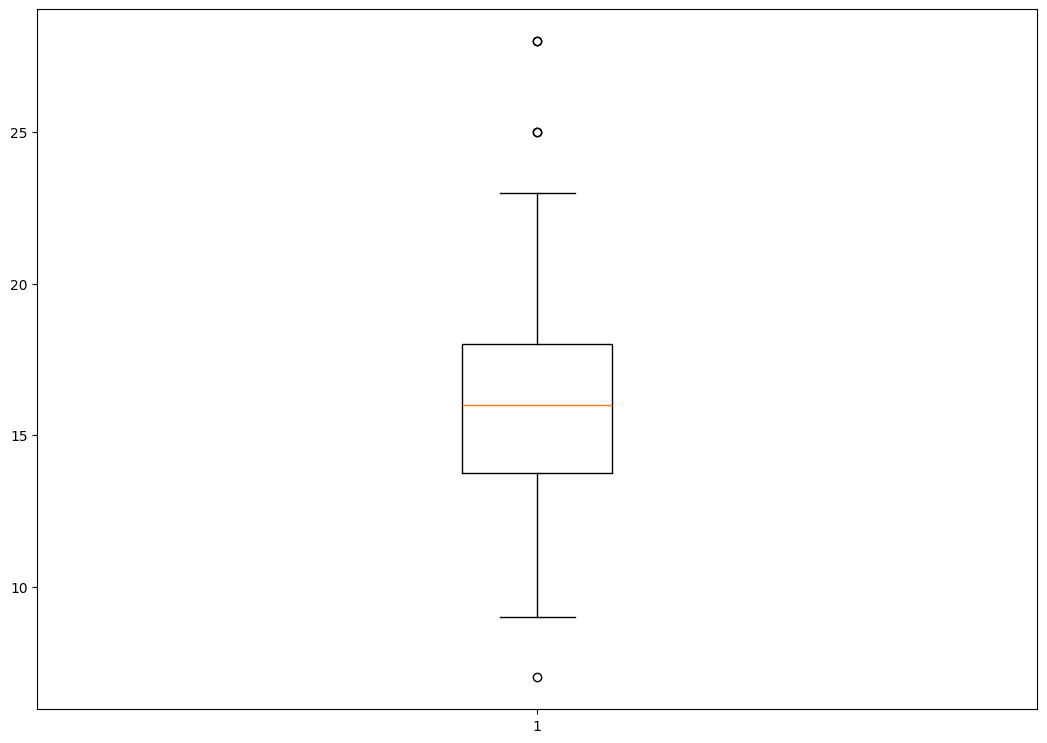

In [58]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(taxas)

# show plot
plt.show()

In [57]:
print(engine.execute("""
    SELECT m.nome , dm.taxa_natalidade
    FROM demografia_municipio AS dm
    INNER JOIN municipio AS m ON m.id = dm.id_municipio
    WHERE dm.taxa_natalidade = (SELECT max(taxa_natalidade) FROM demografia_municipio)
""").fetchall())

print(engine.execute("""
    SELECT m.nome , dm.taxa_natalidade
    FROM demografia_municipio AS dm
    INNER JOIN municipio AS m ON m.id = dm.id_municipio
    WHERE dm.taxa_natalidade = (SELECT min(taxa_natalidade) FROM demografia_municipio)
""").fetchall())

[('Afuá', 28), ('Anajás', 28)]
[('Peixe-Boi', 7)]


## Boxplot votos de candidatos em municipios

In [66]:
top_candidatos = engine.execute("""
    select *
    from (
    	select c.id, c.nome, sum(num_votos)
    	from voto_candidato vc 
    	inner join candidato c on c.id = vc.id_candidato
    	where c.numero >= 1000
    	group by c.id, c.nome, c.numero
    ) as can
    order by can.sum desc
    limit 5
""").fetchall()
top_candidatos

[(450, 'ALESSANDRA HABER CARVALHO SANTOS', 258907),
 (498, 'EDER MAURO CARDOSO BARRA', 205543),
 (445, 'ELCIONE THEREZINHA ZAHLUTH BARBALHO', 175498),
 (449, 'JOSE BENITO PRIANTE JUNIOR', 167275),
 (451, 'RENILCE CONCEIÇÃO NICODEMOS DE ALBUQUERQUE', 162208)]

In [68]:
alessandra = [i[0] for i in engine.execute("""
    select num_votos
    from voto_candidato
    where id_candidato = 450
""").fetchall()]

eder = [i[0] for i in engine.execute("""
    select num_votos
    from voto_candidato
    where id_candidato = 498
""").fetchall()]

elcione = [i[0] for i in engine.execute("""
    select num_votos
    from voto_candidato
    where id_candidato = 445
""").fetchall()]

jose = [i[0] for i in engine.execute("""
    select num_votos
    from voto_candidato
    where id_candidato = 449
""").fetchall()]

renilce = [i[0] for i in engine.execute("""
    select num_votos
    from voto_candidato
    where id_candidato = 451
""").fetchall()]

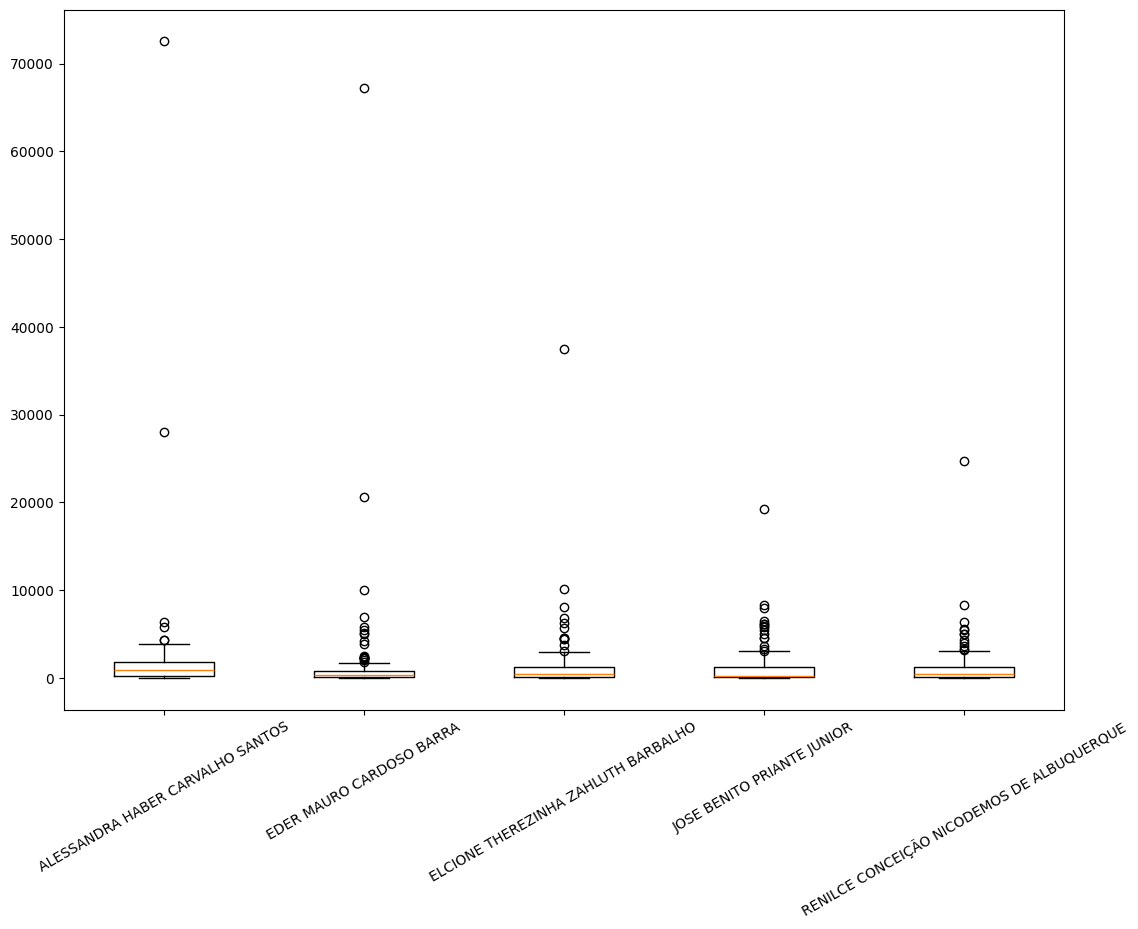

In [78]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([alessandra, eder, elcione, jose, renilce])
plt.xticks([1, 2, 3, 4, 5], [c[1] for c in top_candidatos])
plt.xticks(rotation=30)
# show plot
plt.show()

## Boxplot cobertura vacinal média por cidade

In [127]:
avg_cobertura = [float(c[0]) for c in engine.execute("""
    select avg(cobertura) from vacinacao_municipio group by id_municipio;
""").fetchall()]

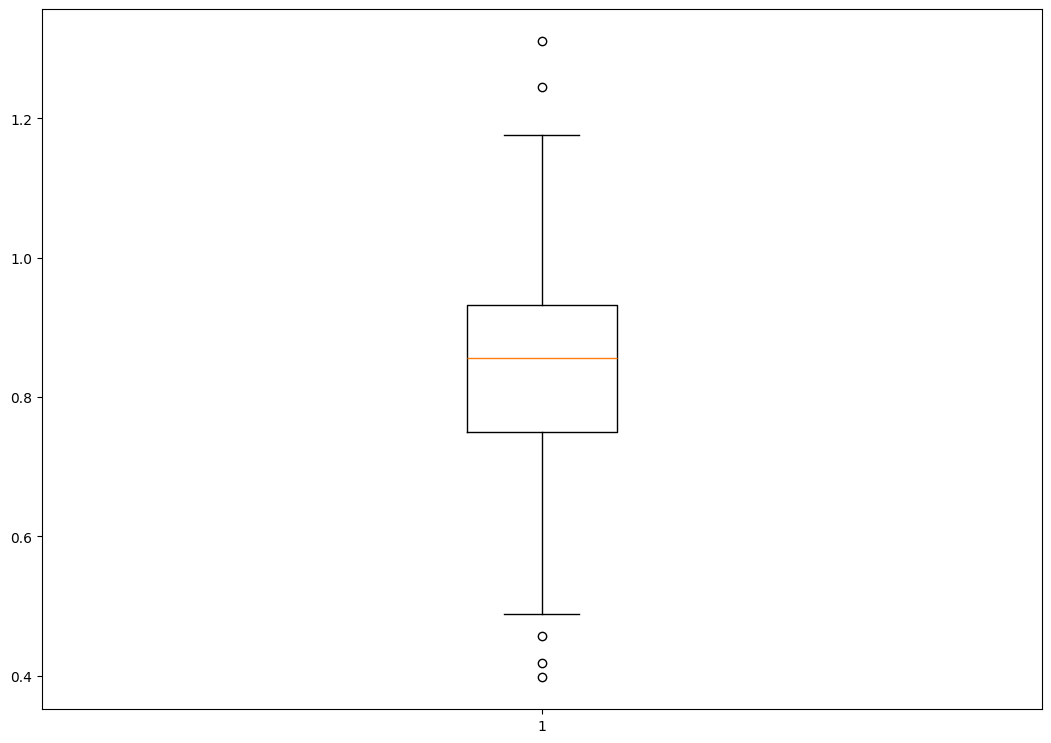

In [129]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(avg_cobertura)
# plt.xticks([1, 2, 3, 4, 5], [c[1] for c in top_candidatos])
# plt.xticks(rotation=30)
# show plot
plt.show()

## Boxplot cobertura vacinal por tipo

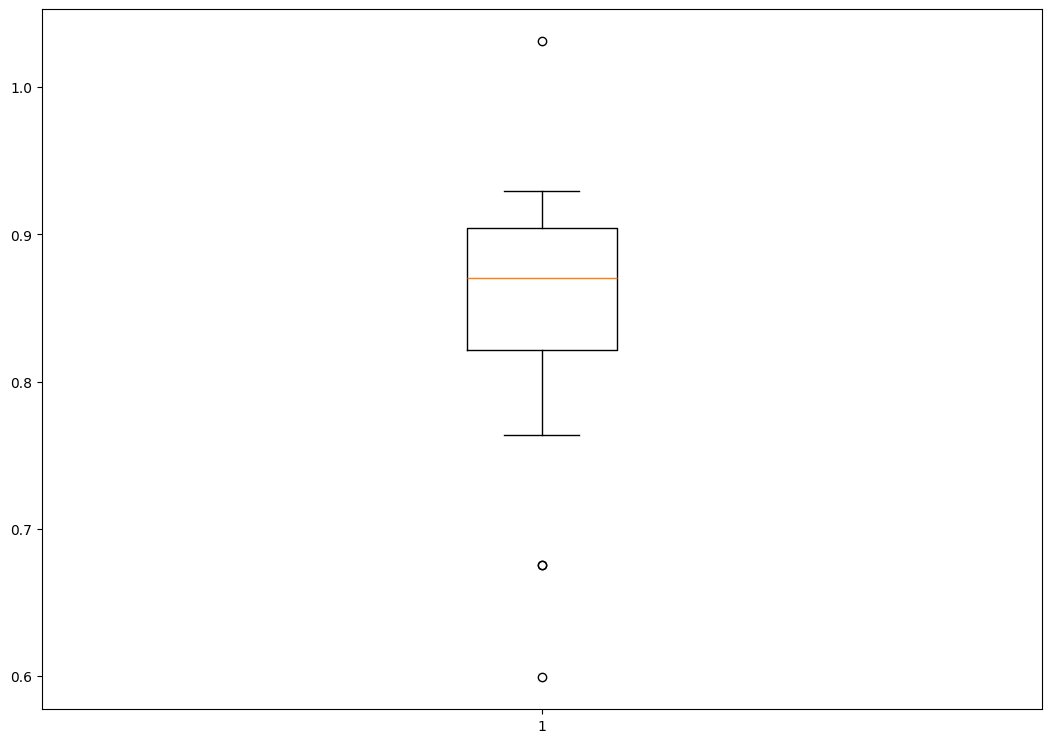

In [130]:
avg_cobertura = [float(c[0]) for c in engine.execute("""
    select avg(cobertura) from vacinacao_municipio group by tipo;
""").fetchall()]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(avg_cobertura)
# plt.xticks([1, 2, 3, 4, 5], [c[1] for c in top_candidatos])
# plt.xticks(rotation=30)
# show plot
plt.show()

## Boxplot cobertura vacinal 

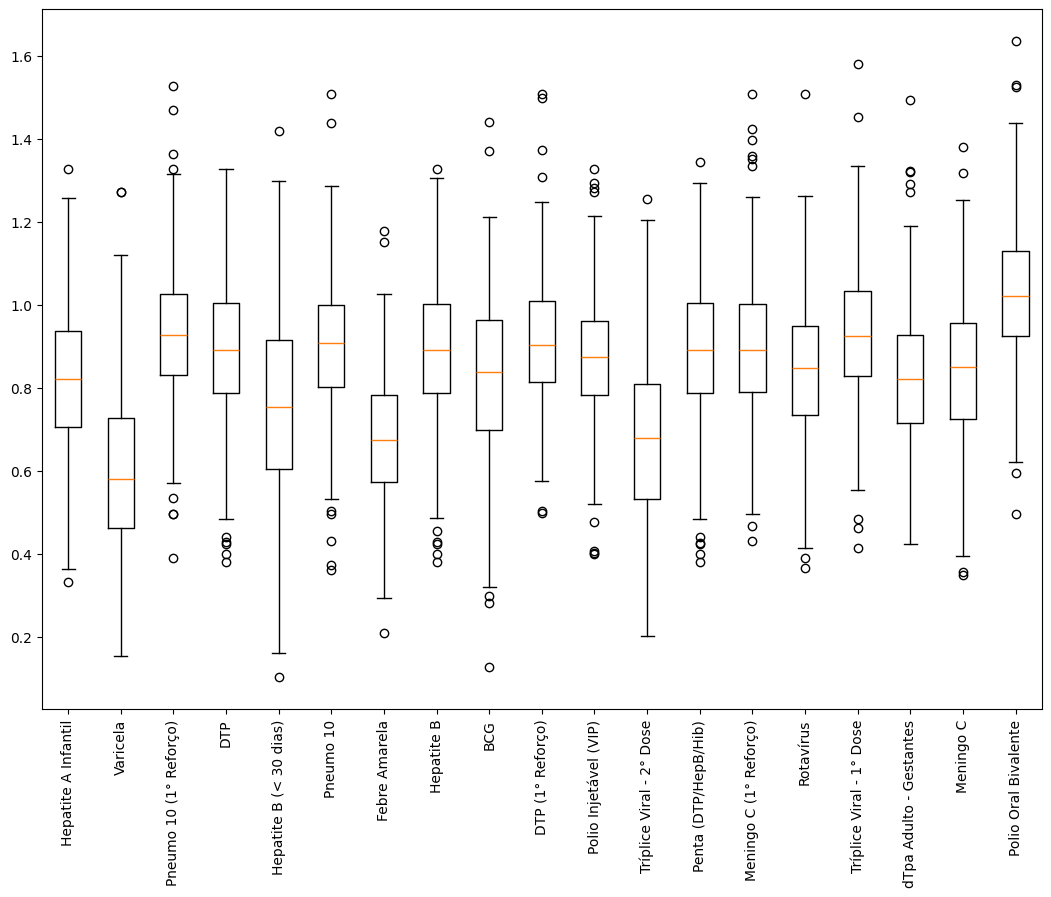

In [141]:
cobertura = [[c[0], [float(f) for f in c[1]]] for c in engine.execute("""
    select tipo, array_agg(cobertura) from vacinacao_municipio group by tipo
""").fetchall()]

values = [x[1] for x in cobertura]
ticks = [x[0] for x in cobertura]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(values)
plt.xticks(list(range(1, len(ticks)+1)), ticks)
plt.xticks(rotation=90)
plt.show()